In [585]:
import torch
from matplotlib import pyplot as plt

In [586]:
words = open("names.txt", 'r').read().splitlines()
len(words)

32033

In [587]:
char = sorted(set(''.join(words)))
stoi = {s:i+1 for i,s in enumerate(char)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
N = torch.zeros((27,27), dtype=int)
N.dtype

torch.int64

In [588]:
for w in words:
    w = '.' + w + '.'
    for ch1,ch2 in zip(w,w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

In [ ]:
N

In [392]:
P = N.float()

In [394]:
P = P / P.sum(1, keepdim=True)

In [398]:
P.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [687]:
g = torch.Generator().manual_seed(2147483647)

In [602]:
dataX,dataY = [],[]
for w in words:
    w = '.' + w + '.'
    for ch1,ch2 in zip(w,w[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        dataX.append(ix1)
        dataY.append(ix2)

In [603]:
dataX = torch.tensor(dataX)
dataY = torch.tensor(dataY)

In [604]:
X = torch.nn.functional.one_hot(dataX,num_classes=27).float()

In [656]:
W = torch.randn((27,27),generator=g,requires_grad=True)

In [657]:
loss_s = [] 
step = 0
y_s = []

In [659]:
x = X
for i in range(100):
    y = x @ W 
    y_s.append(y.sum().item())
    num = y.exp()
    p = num / num.sum(1,keepdim=True)
    yp = p[range(len(X)),dataY]
    loss = -yp.log().mean()
    W.grad = None
    loss.backward()
    loss_s.append(loss.item())
    with torch.no_grad():
        W -= 50*W.grad
    step += 1
    print(loss.item())


2.6783699989318848
2.660799503326416
2.6457247734069824
2.6326231956481934
2.6211161613464355
2.61092209815979
2.6018238067626953
2.5936522483825684
2.586273670196533
2.5795798301696777
2.573481798171997
2.567905902862549
2.5627896785736084
2.5580804347991943
2.553732395172119
2.549706220626831
2.5459675788879395
2.542487382888794
2.5392391681671143
2.536200761795044
2.5333526134490967
2.5306766033172607
2.528158187866211
2.5257840156555176
2.523541212081909
2.5214197635650635
2.5194103717803955
2.5175044536590576
2.5156943798065186
2.5139732360839844
2.5123350620269775
2.5107741355895996
2.5092852115631104
2.507863759994507
2.5065057277679443
2.5052073001861572
2.50396466255188
2.502774238586426
2.501633882522583
2.500539779663086
2.4994900226593018
2.4984817504882812
2.4975130558013916
2.496581792831421
2.495685338973999
2.4948227405548096
2.4939916133880615
2.4931905269622803
2.4924182891845703
2.491672992706299
2.4909539222717285
2.4902586936950684
2.4895873069763184
2.488938093185

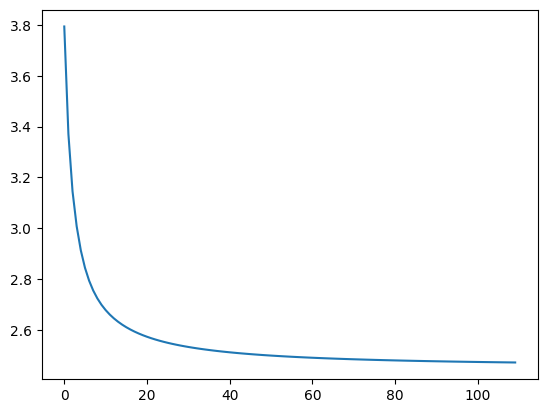

In [660]:
plt.plot(range(step),loss_s)

In [691]:
p = ''
i = 0
with torch.no_grad():
    x = 0
    i == 0
    while True:
        x = torch.nn.functional.one_hot(torch.tensor(x),27).float()
        y = x @ W
        num = y.exp()
        pros = num / num.sum()
        x = torch.multinomial(pros,num_samples=1,replacement=True,generator=g).item()
        if x == 0:
            print(p)
            p = ''
            i += 1
        else: p += itos[x]
        if i > 15:break

jaalilpergha
tezralelia
vywh
elvan
hiahimahacelahmimi
rasabyoni
pn
aliaierenn
jayannda
r
ceremankesorannjresanoman
kyn
deriganazirdab
ta
on
bahatelyti


In [680]:
pros

tensor([0.0678, 0.3400, 0.0044, 0.0037, 0.0050, 0.1740, 0.0040, 0.0051, 0.0565,
        0.0972, 0.0024, 0.0060, 0.0222, 0.0044, 0.0059, 0.0639, 0.0028, 0.0045,
        0.0172, 0.0151, 0.0052, 0.0081, 0.0033, 0.0022, 0.0031, 0.0711, 0.0048])

In [674]:
num

tensor([-2.8999,  1.8704,  0.6523,  0.8186,  0.9104,  0.8115, -0.4938, -0.0185,
         0.2497, -0.1430,  1.2707,  1.4724,  0.8379,  1.3175,  0.5213, -0.5510,
        -0.2813, -1.9475,  0.8797,  1.1062,  0.6538, -2.0521, -0.5981, -0.8029,
        -1.6145, -0.2430,  0.3109])

In [675]:
num

tensor([0.0550, 6.4906, 1.9199, 2.2674, 2.4853, 2.2512, 0.6103, 0.9817, 1.2836,
        0.8668, 3.5633, 4.3599, 2.3116, 3.7341, 1.6842, 0.5764, 0.7548, 0.1426,
        2.4102, 3.0228, 1.9228, 0.1285, 0.5498, 0.4480, 0.1990, 0.7843, 1.3646])

记录前两个字符，生成一个字符

In [751]:
dataX2 = []
dataY2 = []
for w in words:
    w = '..' + w + '.'
    for ch1,ch2,ch3 in zip(w,w[1:],w[2:]):
        dataX2.append([stoi[ch1],stoi[ch2]])
        dataY2.append(stoi[ch3])

In [752]:
dataX2 = torch.tensor(dataX2)
dataY2 = torch.tensor(dataY2)
W = torch.randn((27*2, 27), requires_grad=True)

In [771]:
step = 0
loss_s = []
bachsize = len(dataX2)
old_loss = 6

In [783]:
for i in range(1000):
    xs = torch.nn.functional.one_hot(dataX2[:bachsize], 27).float()
    xs = xs.view([-1,27*2])
    # 计算，向前计算
    y = xs @ W
    num = y.exp()
    probs = num / num.sum(1,keepdim=True)
    pre = probs[range(bachsize), dataY2[:bachsize]]
    loss = -pre.log().sum()/bachsize
    # 向后反向传播梯度
    W.grad = None
    loss.backward()
    step += 1
    loss_s.append(loss.item())
    if(loss > old_loss):
        break
    else: old_loss = loss
    # 更新梯度
    with torch.no_grad():
        W -= 1 * W.grad
    if i%50 == 0:
        print(i,loss.item())

0 2.340022563934326
50 2.340012311935425
100 2.3400015830993652
150 2.3399910926818848
200 2.3399808406829834
250 2.339970350265503
300 2.3399600982666016
350 2.3399500846862793
400 2.339939594268799
450 2.3399295806884766
500 2.339919328689575
550 2.339909315109253
600 2.3398993015289307
650 2.3398895263671875
700 2.3398795127868652
750 2.339869737625122
800 2.3398597240448
850 2.3398501873016357
900 2.3398404121398926
950 2.3398306369781494


In [734]:
loss.item()

4.287729740142822

In [730]:
y.shape

torch.Size([32, 27])

In [803]:
p = ''
i = 0
with torch.no_grad():
    xx = [0,0]
    i == 0
    while True:
        x = torch.nn.functional.one_hot(torch.tensor(xx),27).float()
        x = x.view([54])
        y = x @ W
        num = y.exp()
        pros = num / num.sum()
        xi = torch.multinomial(pros,num_samples=1,replacement=True,generator=g).item()
        if xi == 0:
            print(p)
            p = ''
            xx = [0,0]
            i += 1
        else: 
            p += itos[xi]
            x = [x[1].,xi]
        if i > 15:break

AttributeError: 'int' object has no attribute 'item'

In [798]:
x.shape

torch.Size([54])

In [797]:
x = x.view([54])